In [1]:
import json

# Load data from the JSON file
with open('50Q.json', 'r') as f:
    data = json.load(f)
    
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}

In [2]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [25]:
def explore_nested_dict(d, indent=0, max_samples=6):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)

Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 514
    Sample 2: 1013
    Sample 3: 1204
    Sample 4: 1228
    Sample 5: 1238
    Sample 6: 1247
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 6
  Sample 1: {'pitchDegrees': 30.733656, 'azimuthDegrees': 266.58456, 'stats': {'areaMeters2': 80.44886, 'sunshineQuantiles': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'groundAreaMeters2': 69.15}, 'center': {'latitude': 42.2542113, 'longitude': -70.9628027}, 'boundingBox': {'sw': {'latitude': 42.2541204, 'longitude': -70.96283369999999}, 'ne': {'latitude': 42.2542

In [4]:
# Assuming data has been loaded into a dictionary named `data` from your JSON file
solarPotential_data = data['solarPotential']

def get_sample_bounding_boxes(data):
    # Extract the 'roofSegmentStats' list
    roof_segment_stats = data.get('roofSegmentStats', [])
    
    # Create a list to hold the bounding boxes, azimuthDegrees, and centers
    samples = []

    # Loop through each segment in the roof segment stats
    for segment in roof_segment_stats:
        # Extract the required information
        bounding_box = segment.get('boundingBox', {})
        azimuth_degrees = segment.get('azimuthDegrees', None)
        center = segment.get('center', {})
        
        # Add the extracted information to the samples list
        samples.append({
            'boundingBox': bounding_box,
            'azimuthDegrees': azimuth_degrees,
            'center': center
        })
    
    return samples

# Call the function and store the result
sample_data = get_sample_bounding_boxes(solarPotential_data)

# For demonstration, print the results
for idx, sample in enumerate(sample_data):
    print(f"Sample {idx+1}:")
    print(f"Bounding Box: {sample['boundingBox']}")
    print(f"Azimuth Degrees: {sample['azimuthDegrees']}")
    print(f"Center: {sample['center']}")
    print()  # Just to add an empty line between samples
    



Sample 1:
Bounding Box: {'sw': {'latitude': 42.2541204, 'longitude': -70.96283369999999}, 'ne': {'latitude': 42.2542924, 'longitude': -70.9627678}}
Azimuth Degrees: 266.58456
Center: {'latitude': 42.2542113, 'longitude': -70.9628027}

Sample 2:
Bounding Box: {'sw': {'latitude': 42.2542265, 'longitude': -70.9627853}, 'ne': {'latitude': 42.254294699999996, 'longitude': -70.96274319999999}}
Azimuth Degrees: 85.3547
Center: {'latitude': 42.2542633, 'longitude': -70.9627656}

Sample 3:
Bounding Box: {'sw': {'latitude': 42.2541303, 'longitude': -70.9627763}, 'ne': {'latitude': 42.254198599999995, 'longitude': -70.96272809999999}}
Azimuth Degrees: 88.282814
Center: {'latitude': 42.2541653, 'longitude': -70.962754}

Sample 4:
Bounding Box: {'sw': {'latitude': 42.2541134, 'longitude': -70.962817}, 'ne': {'latitude': 42.254146399999996, 'longitude': -70.9627276}}
Azimuth Degrees: 177.24368
Center: {'latitude': 42.254128099999996, 'longitude': -70.9627699}

Sample 5:
Bounding Box: {'sw': {'latitu

In [37]:
import math
from shapely.geometry import Point
from geopy.distance import geodesic

# Assuming `solarPotential_data` is your loaded data
# Initialize an empty list to hold the samples
samples = []

for segment in solarPotential_data['roofSegmentStats']:
    # Create a Point object for the center
    center_point = Point(segment['center']['longitude'], segment['center']['latitude'])
    azimuth = segment['azimuthDegrees']
    pitch = segment['pitchDegrees']
    planeHeightAtCenterMeters = segment['planeHeightAtCenterMeters']
    sunshineQuantiles = segment ['stats']['sunshineQuantiles']
    Area = segment['stats']['areaMeters2']
    
    
    
    

    # Calculate displacement vectors for NE and SW points relative to the center point
    ne_displacement = (segment['boundingBox']['ne']['latitude'] - center_point.y,
                       segment['boundingBox']['ne']['longitude'] - center_point.x)
    sw_displacement = (segment['boundingBox']['sw']['latitude'] - center_point.y,
                       segment['boundingBox']['sw']['longitude'] - center_point.x)

    # Rotate displacement vectors by negative azimuth degree to align with azimuth 0
    azimuth_rad = math.radians(-azimuth)
    ne_displacement_rotated = (ne_displacement[0] * math.cos(azimuth_rad) - ne_displacement[1] * math.sin(azimuth_rad),
                               ne_displacement[0] * math.sin(azimuth_rad) + ne_displacement[1] * math.cos(azimuth_rad))
    sw_displacement_rotated = (sw_displacement[0] * math.cos(azimuth_rad) - sw_displacement[1] * math.sin(azimuth_rad),
                               sw_displacement[0] * math.sin(azimuth_rad) + sw_displacement[1] * math.cos(azimuth_rad))

    # Calculate the new NE and SW points by adding the rotated displacements to the center
    ne_new = (center_point.y + ne_displacement_rotated[0], center_point.x + ne_displacement_rotated[1])
    sw_new = (center_point.y + sw_displacement_rotated[0], center_point.x + sw_displacement_rotated[1])

    # Calculate width and height as the distance between the new NE and SW points
    width = geodesic((sw_new[0], sw_new[1]), (sw_new[0], ne_new[1])).meters
    height = geodesic((sw_new[0], sw_new[1]), (ne_new[0], sw_new[1])).meters
    # taking pitch into account
    height = height * math.cos(math.radians(pitch))
    

    # Add the sample to the list with azimuth degree set to 0
    samples.append({
        'center': {'latitude': center_point.y, 'longitude': center_point.x},
        'width': width,  # in meters
        'height': height,  # in meters
        'azimuthDegrees': azimuth, # in degrees
        'planeHeightAtCenterMeters': planeHeightAtCenterMeters,
        'sunshineQuantiles': sunshineQuantiles,
        'pitchDegrees': pitch
    })

# For demonstration, print the results for one sample
print(samples[0])


{'center': {'latitude': 42.2542113, 'longitude': -70.9628027}, 'width': 13.844278201527262, 'height': 7.25914861433413, 'azimuthDegrees': 266.58456, 'planeHeightAtCenterMeters': 9.990049, 'sunshineQuantiles': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'pitchDegrees': 30.733656}


[{'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.184712349138427, 'azimuthDegrees': 184.46716, 'corners': [Point(42.25414714630581, -70.96284160852508, 0.0), Point(42.25427156032549, -70.96285160338918, 0.0), Point(42.25427545367644, -70.96276379148235, 0.0), Point(42.254151039656854, -70.96275379661763, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.184712349138427, 'azimuthDegrees': 184.46716, 'corners': [Point(42.25428886908365, -70.962740637781, 0.0), Point(42.25424106017192, -70.96273540873905, 0.0), Point(42.254237730909544, -70.96279056221967, 0.0), Point(42.2542855398213, -70.96279579126133, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.184712349138427, 'azimuthDegrees': 184.46716, 'corners': [Point(42.25419076424977, -70.9627256732826, 0.0), Point(42.25414114211861, -70.96272367080078, 0.0), Poin

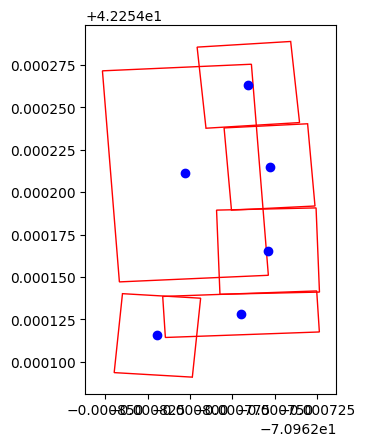

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from geopy.distance import geodesic
from geopy.point import Point

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    
    # Assuming the azimuth_degrees is pointing to the top of the panel
    # Calculate the top center point
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    # Calculate the bottom center point
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    
    # Calculate the corners
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    
    return [top_left, top_right, bottom_right, bottom_left]

# Function to draw a polygon representing a panel on the plot
def draw_panel(ax, corners):
    polygon = patches.Polygon([(point.longitude, point.latitude) for point in corners], closed=True, edgecolor='r', fill=False)
    ax.add_patch(polygon)


# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Prepare lists to hold the latitude and longitude values for setting plot bounds
lats = []
longs = []

SegBox =[]
# Draw each sample on the plot
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    draw_panel(ax, corners)
    # Add the sample to the list with azimuth degree set to 0
    SegBox.append({
        'center': segment['center'],
        'width': width,  # in meters
        'height': height,  # in meters
        'azimuthDegrees': segment['azimuthDegrees'],
        'corners': corners
    })
    # Append the corner coordinates to the lists
    lats += [corner.latitude for corner in corners]
    longs += [corner.longitude for corner in corners]

    # Plot the center of the panel
    ax.plot(sample['center']['longitude'], sample['center']['latitude'], 'bo')

print (SegBox)
# Set the bounds of the plot
margin = 0.00001  # Increase margin if necessary
ax.set_xlim(min(longs) - margin, max(longs) + margin)
ax.set_ylim(min(lats) - margin, max(lats) + margin)

# Show the plot
plt.show()


In [39]:
import folium
from geopy.distance import geodesic
from geopy.point import Point

# Using a CartoDB tileset for the map
tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png'

# Initialize the map with the CartoDB tileset and a high max_zoom
m = folium.Map(
    location=[42.3298, -71.0806],
    zoom_start=18,
    max_zoom=30,  # Set a very high max_zoom in case it's supported
    tiles=tiles,
    attr='© OpenStreetMap contributors, © CARTO'
)

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
# This function computes the corners of a solar panel given the center point, width, height, and azimuth angle.
# The function first computes the center point, then computes the top and bottom center points, then uses the center and width to compute the top left, top right, bottom right, and bottom left points.

def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    return [top_left, top_right, bottom_right, bottom_left]


# Initialize the map with a sample center point
m = folium.Map(location=[samples[1]['center']['latitude'], samples[1]['center']['longitude']], zoom_start=30)

# Draw each sample on the map
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    # Convert corners to a format that folium understands: [[lat, lon], [lat, lon], ...]
    corners = [(corner.latitude, corner.longitude) for corner in corners]
    # Create a Polygon with the corners and add it to the map
    folium.Polygon(
        locations=corners,
        color='blue',
        weight=2,
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
    ).add_to(m)

# Save the map to an HTML file
m



In [14]:
def get_panels_centers(center, width, height, azimuth_degrees, panel_width, panel_height):
    center_point = Point(center['latitude'], center['longitude'])

    # Calculate the bottom center point
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)

    # Calculate the bottom-left corner
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)

    panel_centers = []

    # Calculate the center points of each panel
    for i in range(int(width // panel_width)):
        for j in range(int(height // panel_height)):
            # Calculate panel center relative to bottom-left corner
            panel_center_x = (i + 0.5) * panel_width 
            panel_center_y = (j + 0.5) * panel_height

            # Calculate panel center relative to bottom-left corner
            top_center = compute_offset(bottom_left, panel_center_y, azimuth_degrees)
            top_right = compute_offset(top_center, panel_center_x, (azimuth_degrees + 90) % 360)
            

            panel_centers.append(( top_right.longitude, top_right.latitude))

    return panel_centers

# Example usage
panel_width = 1.5  # Panel width in meters (or degrees)
panel_height = 1.8  # Panel height in meters (or degrees)

# Assuming you have a samples list
for sample in samples:
    panelcenters = get_panels_centers(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'], panel_width, panel_height)
    sample['panelcenters'] = panelcenters

# Printing the first sample for demonstration
print(samples[0])


{'center': {'latitude': 42.2542113, 'longitude': -70.9628027}, 'width': 13.844278201527262, 'height': 8.445267655058776, 'azimuthDegrees': 266.58456, 'planeHeightAtCenterMeters': 9.990049, 'sunshineQuantiles': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'panelcenters': [(-70.96275805104194, 42.25415761503561), (-70.96277982512136, 42.254156649624605), (-70.96280159920009, 42.25415568420948), (-70.96282337327817, 42.25415471879022), (-70.96275913396505, 42.254171095047205), (-70.96278090804444, 42.25417012963621), (-70.96280268212315, 42.25416916422109), (-70.96282445620123, 42.254168198801835), (-70.96276021688861, 42.254184575058765), (-70.96278199096798, 42.25418360964778), (-70.96280376504669, 42.25418264423266), (-70.96282553912474, 42.254181678813396), (-70.96276129981264, 42.254198055070304), (-70.96278307389198, 42.25419708965931), (-70.96280484797067, 42.254196124244196), (-70.96282662204871, 42.254195158824935), (-70.96276238273713, 42.25421153508177), (-

Sample 1 has 26 panel centers.
Sample 2 has 6 panel centers.
Sample 3 has 9 panel centers.
Sample 4 has 4 panel centers.
Sample 5 has 6 panel centers.
Sample 6 has 4 panel centers.


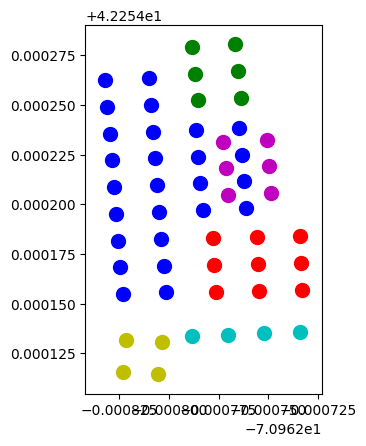

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect('equal')

# Prepare lists to hold the latitude and longitude values for setting plot bounds
lats = []
longs = []

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Different colors for different samples

# Iterate over each sample to plot the panel centers
for index, sample in enumerate(samples):
    color = colors[index % len(colors)]  # Cycle through colors
    num_centers = len(sample['panelcenters'])
    print(f"Sample {index+1} has {num_centers} panel centers.")  # Diagnostic print

    for center in sample['panelcenters']:
        ax.plot(center[0], center[1], marker='o', color=color, markersize=10)  # Increased marker size
        lats.append(center[1])
        longs.append(center[0])

# Set the bounds of the plot
margin = 0.00001  # Adjust margin as necessary
ax.set_xlim(min(longs) - margin, max(longs) + margin)
ax.set_ylim(min(lats) - margin, max(lats) + margin)

plt.show()


In [18]:
import math

def distance_between_points(point1, point2):
    """ Calculate the Euclidean distance between two points. """
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def remove_overlapping_panels(samples, min_width, min_height):
    """ Remove panels that are too close to each other from the samples. """
    #calculate the minimum width and height in geo coordinates
    min_width = min_width / 111111
    min_height = min_height / 111111
    min_distance = min(min_width, min_height)
    panels_to_remove = set()

    for i, sample1 in enumerate(samples):
        for j in range(i + 1, len(samples)):
            sample2 = samples[j]

            for center1 in sample1.get('panelcenters', []):
                for center2 in sample2.get('panelcenters', []):
                    if distance_between_points(center1, center2) < min_distance:
                        print(f"Removing overlapping panels: {center1} and {center2}")
                        # Determine which panel to remove
                        if sample1['planeHeightAtCenterMeters'] > sample2['planeHeightAtCenterMeters']:
                            panels_to_remove.add((j, center2))  # Remove from sample2
                        else:
                            panels_to_remove.add((i, center1))  # Remove from sample1

    # Remove marked panels
    for index, center in panels_to_remove:
        samples[index]['panelcenters'] = [c for c in samples[index]['panelcenters'] if c != center]


min_width = 1.8  # Minimum width threshold
min_height = 1.0  # Minimum height threshold

remove_overlapping_panels(samples, min_width, min_height)

# Print the modified samples
for sample in samples:
    print(sample['panelcenters'])


[(-70.96280159920009, 42.25415568420948), (-70.96282337327817, 42.25415471879022), (-70.96280268212315, 42.25416916422109), (-70.96282445620123, 42.254168198801835), (-70.96280376504669, 42.25418264423266), (-70.96282553912474, 42.254181678813396), (-70.96276129981264, 42.254198055070304), (-70.96278307389198, 42.25419708965931), (-70.96280484797067, 42.254196124244196), (-70.96282662204871, 42.254195158824935), (-70.96276238273713, 42.25421153508177), (-70.96278415681645, 42.25421056967079), (-70.96280593089513, 42.25420960425568), (-70.96282770497315, 42.25420863883642), (-70.96276346566206, 42.254225015093205), (-70.9627852397414, 42.25422404968223), (-70.96280701382004, 42.254223084267124), (-70.96282878789805, 42.25422211884787), (-70.96276454858747, 42.254238495104616), (-70.96278632266677, 42.25423752969362), (-70.96280809674542, 42.25423656427852), (-70.9628298708234, 42.25423559885927), (-70.96280917967125, 42.254250044289876), (-70.96283095374922, 42.25424907887062), (-70.962

In [20]:
import pandas as pd

panel_data = []

for sample_index, sample in enumerate(samples):
    avg_sunshine = sum(sample['sunshineQuantiles']) / len(sample['sunshineQuantiles'])
    for panel_index, center in enumerate(sample.get('panelcenters', [])):
        panel_info = {
            'Panel Number': f"{sample_index+1}-{panel_index+1}",
            'Sample': sample_index + 1,
            'Panel Center': center,
            'Average Sunshine Quantile': avg_sunshine
        }
        panel_data.append(panel_info)

# Create a DataFrame
df = pd.DataFrame(panel_data)

# Sort the DataFrame by 'Average Sunshine Quantile' 
df_sorted = df.sort_values(by='Average Sunshine Quantile', ascending=False)

# Print the top 10 panels
df_sorted 

,Panel Number,Sample,Panel Center,Average Sunshine Quantile
41,4-1,4,"(-70.96273399218892, 42.25413562045995)",1363.636364
44,4-4,4,"(-70.96278846114414, 42.25413367228964)",1363.636364
43,4-3,4,"(-70.96277030482611, 42.25413432168261)",1363.636364
42,4-2,4,"(-70.9627521485077, 42.25413497107272)",1363.636364
50,5-6,5,"(-70.9627483786413, 42.25420564335629)",1266.909091
49,5-5,5,"(-70.96277014313597, 42.25420456490253)",1266.909091
48,5-4,5,"(-70.96274958837698, 42.25421911741477)",1266.909091
47,5-3,5,"(-70.96277135287163, 42.25421803896101)",1266.909091
46,5-2,5,"(-70.96275079811318, 42.2542325914732)",1266.909091
45,5-1,5,"(-70.96277256260781, 42.254231513019434)",1266.909091
